In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../Datos/Mental_Health_Lifestyle_Dataset.csv")
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


In [6]:
stress_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
exercise_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}

# Aplicamos los mapeos
df['Stress Level'] = df['Stress Level'].map(stress_mapping)
df['Exercise Level'] = df['Exercise Level'].map(exercise_mapping)

df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,0.5,Balanced,7.0,1.0,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,0.0,Junk Food,7.1,0.0,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,0.5,Balanced,6.0,1.0,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,1.0,Keto,5.7,0.0,Anxiety,51,4.3,5.9,4.1


In [7]:
 #Eliminamos la columna Gender y creamos columnas binarias para cada género
df["Male"] = (df["Gender"] == "Male").astype(int)
df["Female"] = (df["Gender"] == "Female").astype(int)
df["Other"] = (df["Gender"] == "Other").astype(int)
# Eliminamos la columna original de Gender
df = df.drop("Gender", axis=1)

df.head()

,Country,Age,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other
0,Brazil,48,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0
1,Australia,31,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0
2,Japan,37,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0
3,Brazil,35,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0
4,Germany,46,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0


In [8]:
df["Vegetarian"] = (df["Diet Type"] == "Vegetarian").astype(int)
df["Vegan"] = (df["Diet Type"] == "Vegan").astype(int)
df["Balanced"] = (df["Diet Type"] == "Balanced").astype(int)
df["Keto"] = (df["Diet Type"] == "Keto").astype(int)
df["Junk Food"] = (df["Diet Type"] == "Junk Food").astype(int)
df = df.drop("Diet Type", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food
0,Brazil,48,0.0,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0,1,0,0,0,0
1,Australia,31,0.5,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0,0,1,0,0,0
2,Japan,37,0.0,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0,1,0,0,0,0
3,Brazil,35,0.0,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0,0,1,0,0,0
4,Germany,46,0.0,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0,0,0,1,0,0


In [9]:
df["Mental Health Condition"] = df["Mental Health Condition"].fillna("None")

df["PTSD"] = (df["Mental Health Condition"] == "PTSD").astype(int)
df["Anxiety"] = (df["Mental Health Condition"] == "Anxiety").astype(int)
df["Depression"] = (df["Mental Health Condition"] == "Depression").astype(int)
df["None"] = (df["Mental Health Condition"] == "None").astype(int)
df["Bipolar"] = (df["Mental Health Condition"] == "Bipolar").astype(int)
df = df.drop("Mental Health Condition", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,...,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,Brazil,48,0.0,6.3,0.0,21,4.0,7.8,6.5,1,...,1,0,0,0,0,0,0,0,1,0
1,Australia,31,0.5,4.9,0.0,48,5.2,8.2,6.8,1,...,0,1,0,0,0,1,0,0,0,0
2,Japan,37,0.0,7.2,1.0,43,4.7,9.6,9.7,0,...,1,0,0,0,0,0,0,0,1,0
3,Brazil,35,0.0,7.2,0.0,43,2.2,8.2,6.6,1,...,0,1,0,0,0,0,0,1,0,0
4,Germany,46,0.0,7.3,0.0,35,3.6,4.7,4.4,1,...,0,0,1,0,0,0,1,0,0,0


Distribucion por genero

/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2784413744.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])


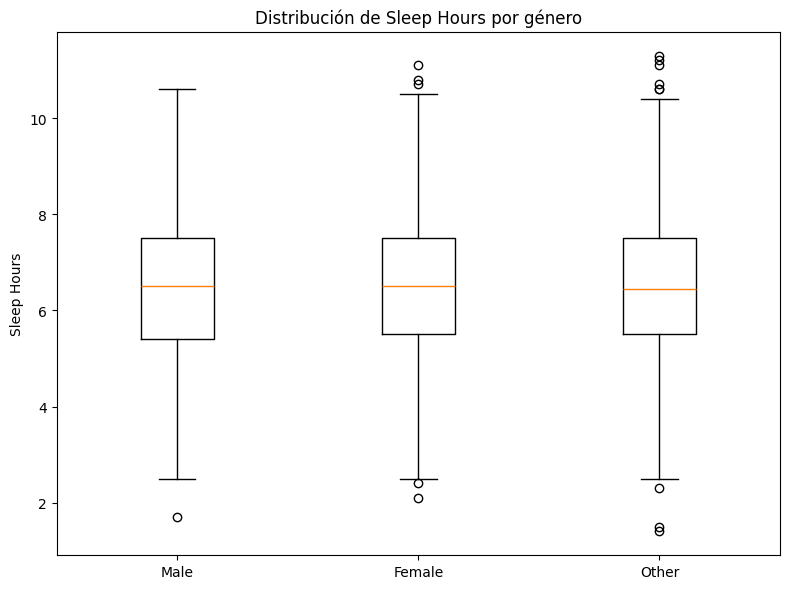

/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2784413744.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])


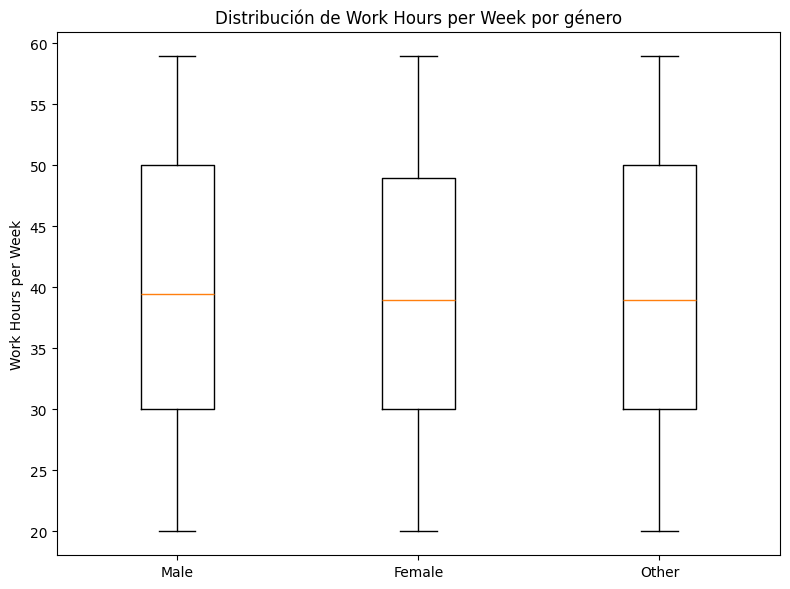

/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2784413744.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])


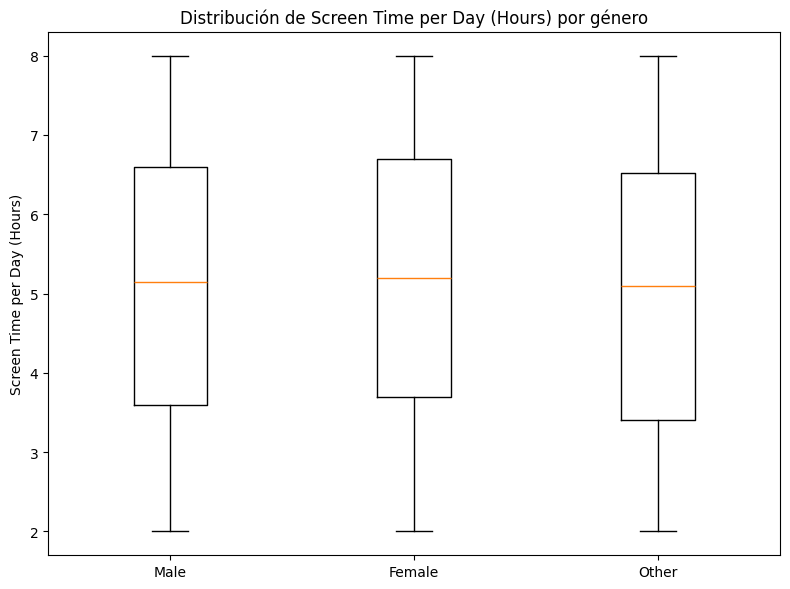

/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2784413744.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])


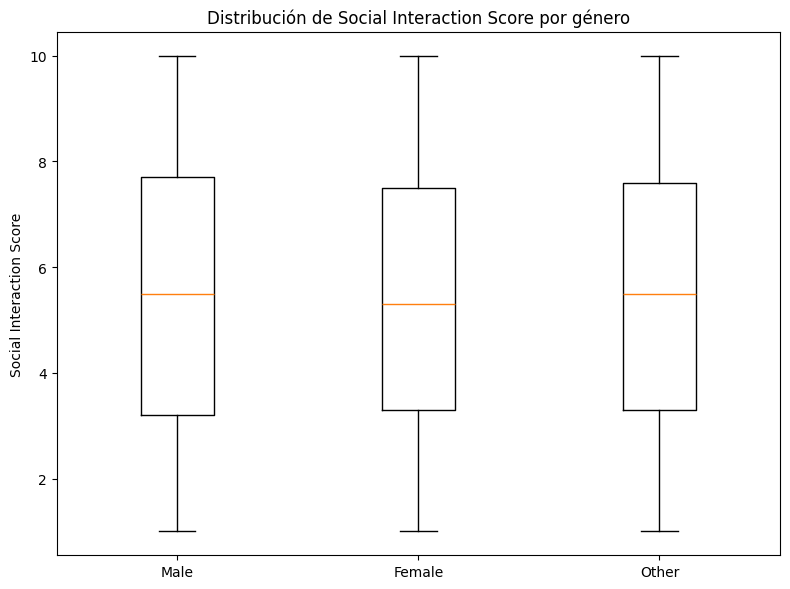

/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2784413744.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])


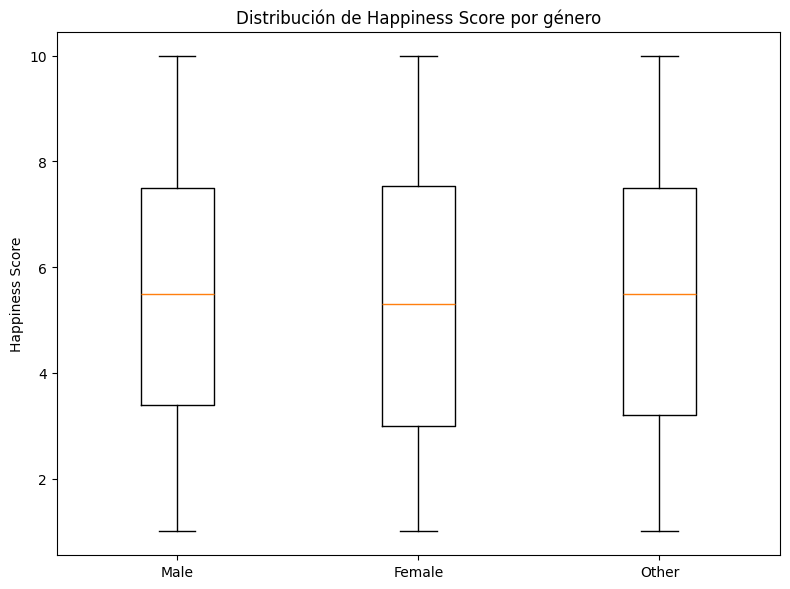

In [10]:
# Lista de atributos numéricos que querés analizar
atributos = [
    'Sleep Hours',
    'Work Hours per Week',
    'Screen Time per Day (Hours)',
    'Social Interaction Score',
    'Happiness Score'
    # Agregá más si querés
]

# Crear un boxplot para cada atributo, por género (usando one-hot)
for atributo in atributos:
    male = df[df['Male'] == 1][atributo]
    female = df[df['Female'] == 1][atributo]
    other = df[df['Other'] == 1][atributo]

    plt.figure(figsize=(8, 6))
    plt.boxplot([male, female, other], labels=['Male', 'Female', 'Other'])
    plt.title(f'Distribución de {atributo} por género')
    plt.ylabel(atributo)
    plt.tight_layout()
    plt.show()


Comparaciones entre atributos

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Crear copia del DataFrame original
df_norm = df.copy()

# Seleccionar columnas a normalizar
scaler = MinMaxScaler()
df_norm[['Happiness Score', 'Stress Level']] = scaler.fit_transform(
    df_norm[['Happiness Score', 'Stress Level']]
)


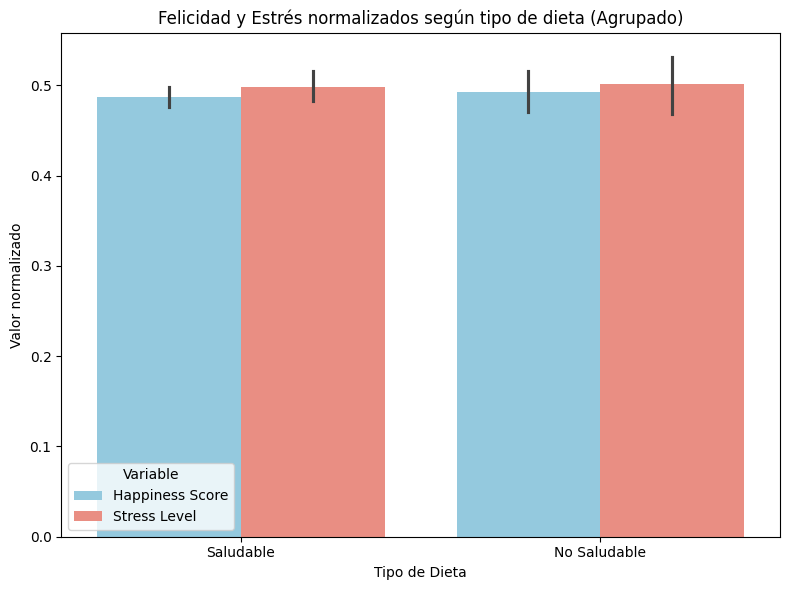

In [14]:


# Supongamos que tu DataFrame df_norm tiene las columnas necesarias
# y ya has creado la columna 'Tipo Dieta Agrupado' como en el código anterior.

# Creamos la columna 'Tipo Dieta Agrupado' si aún no la tienes
def agrupar_dieta(row):
    if row['Junk Food'] == True:
        return 'No Saludable'
    elif row['Vegetarian'] == True or row['Vegan'] == True or row['Balanced'] == True or row['Keto'] == True:
        return 'Saludable'
    else:
        return 'Otro'

df_norm['Tipo Dieta Agrupado'] = df_norm.apply(agrupar_dieta, axis=1)

# Filtramos las filas donde alguna dieta está marcada como True
df_filtered = df_norm[df_norm[['Vegetarian', 'Vegan', 'Balanced', 'Keto', 'Junk Food']].any(axis=1)]

# Preparamos los datos para el gráfico con melt
df_melted = pd.melt(df_filtered,
                    id_vars='Tipo Dieta Agrupado',
                    value_vars=['Happiness Score', 'Stress Level'],
                    var_name='Variable',
                    value_name='Valor')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted,
            x='Tipo Dieta Agrupado', y='Valor', hue='Variable',
            palette=['skyblue', 'salmon']) # Usamos 'skyblue' y 'steelblue' para tonos de azul
plt.title('Felicidad y Estrés normalizados según tipo de dieta (Agrupado)')
plt.ylabel('Valor normalizado')
plt.xlabel('Tipo de Dieta')
plt.legend(title='Variable')
plt.tight_layout()
plt.show()


/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/542047626.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sleep = df_norm.groupby('Sleep Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()


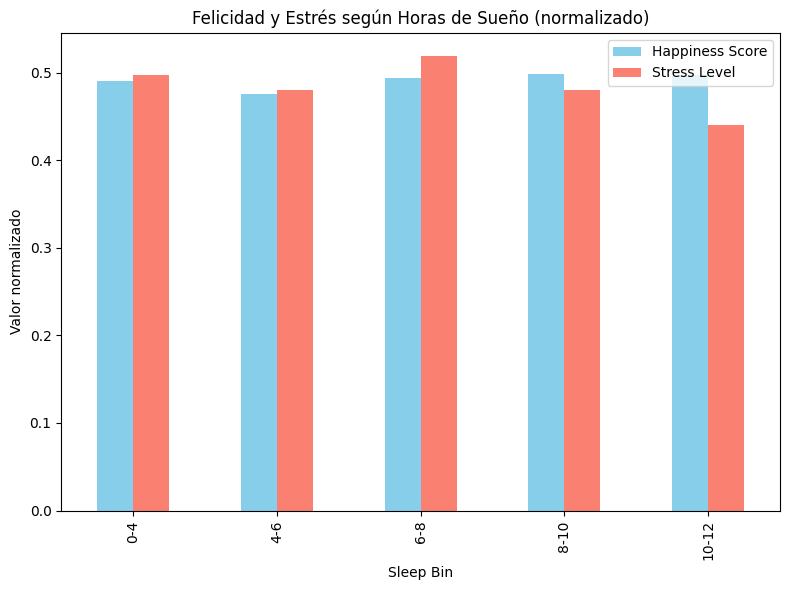

In [15]:
df_norm['Sleep Bin'] = pd.cut(df_norm['Sleep Hours'], bins=[0, 4, 6, 8, 10, 12], labels=['0-4', '4-6', '6-8', '8-10', '10-12'])

df_sleep = df_norm.groupby('Sleep Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()

df_sleep.plot(x='Sleep Bin', kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Felicidad y Estrés según Horas de Sueño (normalizado)')
plt.ylabel('Valor normalizado')
plt.tight_layout()
plt.show()


/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/1180157960.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_work = df_norm.groupby('Work Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()


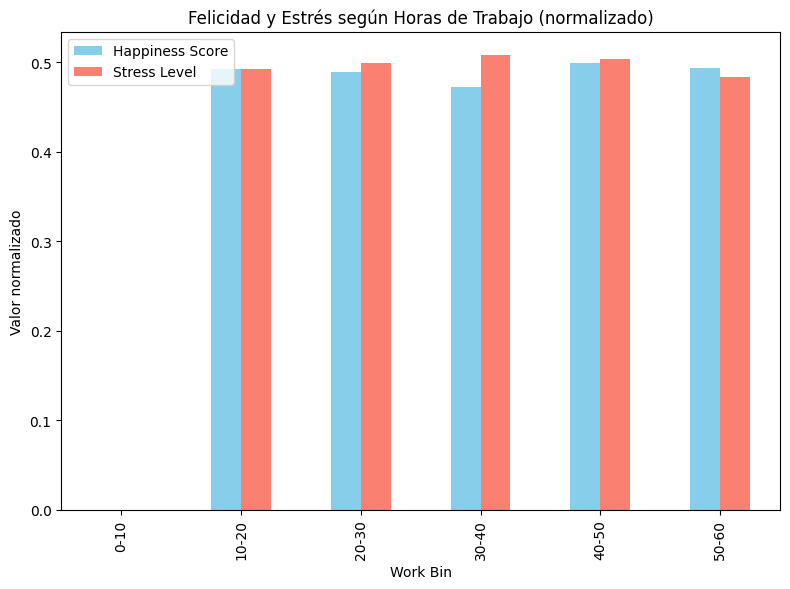

In [16]:
df_norm['Work Bin'] = pd.cut(df_norm['Work Hours per Week'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'])

df_work = df_norm.groupby('Work Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()

df_work.plot(x='Work Bin', kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Felicidad y Estrés según Horas de Trabajo (normalizado)')
plt.ylabel('Valor normalizado')
plt.tight_layout()
plt.show()


/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/4089678257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_screen = df_norm.groupby('Screen Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()


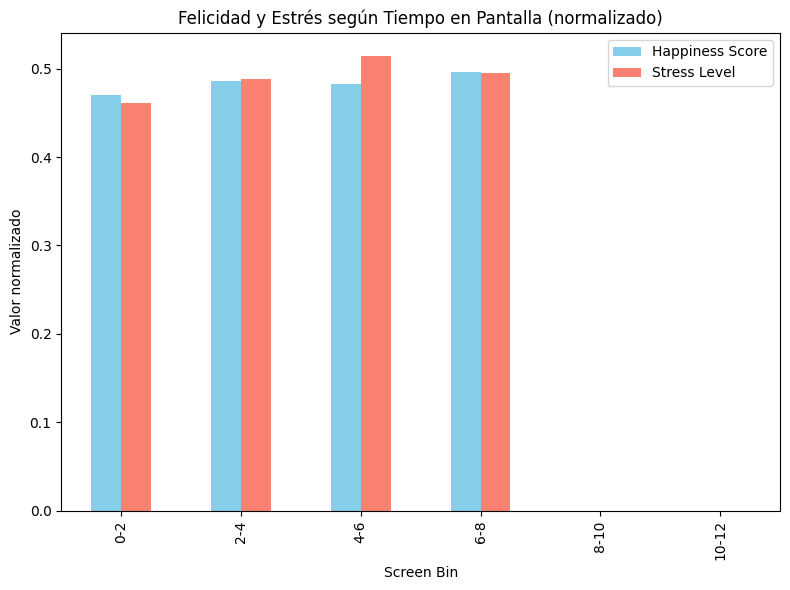

In [17]:
df_norm['Screen Bin'] = pd.cut(df_norm['Screen Time per Day (Hours)'], bins=[0, 2, 4, 6, 8, 10, 12], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12'])

df_screen = df_norm.groupby('Screen Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()

df_screen.plot(x='Screen Bin', kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Felicidad y Estrés según Tiempo en Pantalla (normalizado)')
plt.ylabel('Valor normalizado')
plt.tight_layout()
plt.show()


/var/folders/ts/6twr910d08vcwqqv_d3y4j_00000gn/T/ipykernel_14611/2919522402.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_social = df_norm.groupby('Social Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()


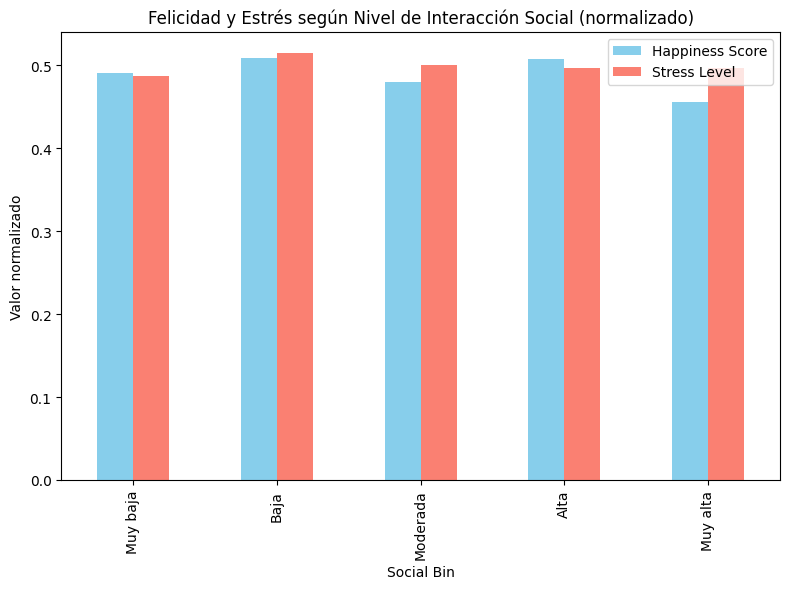

In [18]:
df_norm['Social Bin'] = pd.qcut(df_norm['Social Interaction Score'], q=5, labels=['Muy baja', 'Baja', 'Moderada', 'Alta', 'Muy alta'])

df_social = df_norm.groupby('Social Bin')[['Happiness Score', 'Stress Level']].mean().reset_index()

df_social.plot(x='Social Bin', kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Felicidad y Estrés según Nivel de Interacción Social (normalizado)')
plt.ylabel('Valor normalizado')
plt.tight_layout()
plt.show()


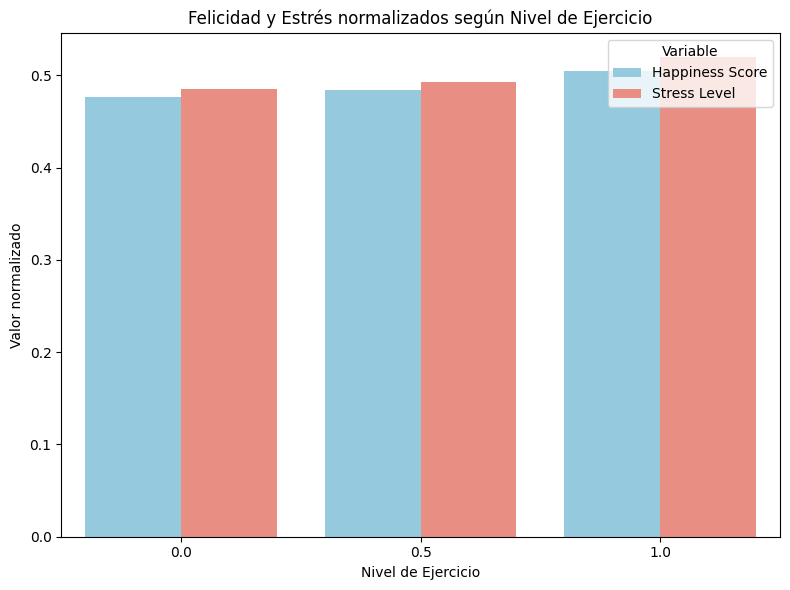

In [19]:


# Calcular promedios de felicidad y estrés por nivel de ejercicio
grupo_ejercicio = df_norm.groupby('Exercise Level')[['Happiness Score', 'Stress Level']].mean().reset_index()

# Reformatear para graficar
df_melt = grupo_ejercicio.melt(id_vars='Exercise Level',
                                value_vars=['Happiness Score', 'Stress Level'],
                                var_name='Variable', value_name='Valor')

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melt, x='Exercise Level', y='Valor', hue='Variable', palette=['skyblue', 'salmon'])
plt.title('Felicidad y Estrés normalizados según Nivel de Ejercicio')
plt.ylabel('Valor normalizado')
plt.xlabel('Nivel de Ejercicio')
plt.tight_layout()
plt.show()


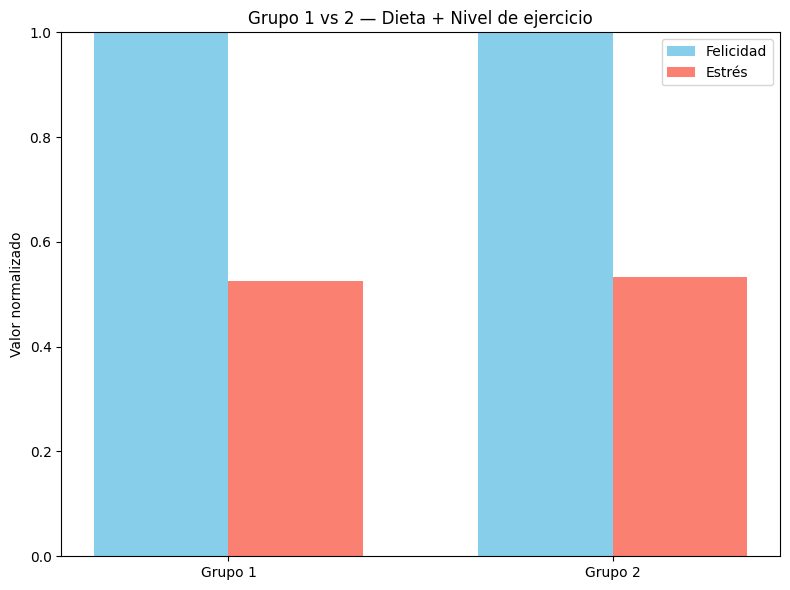

In [20]:
# Grupos
grupo1 = df[((df[['Vegetarian', 'Vegan', 'Balanced',"Keto"]].sum(axis=1) > 0)) & (df['Exercise Level'] == 1)]
grupo2 = df[((df[['Junk Food']].sum(axis=1) > 0)) & (df['Exercise Level'] == 0)]

# Medias normalizadas
h1, e1 = grupo1['Happiness Score'].mean(), grupo1['Stress Level'].mean()
h2, e2 = grupo2['Happiness Score'].mean(), grupo2['Stress Level'].mean()

# Gráfico
labels = ['Grupo 1', 'Grupo 2']
felicidad = [h1, h2]
estres = [e1, e2]
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x, felicidad, width=width, label='Felicidad', color='skyblue')
plt.bar([p + width for p in x], estres, width=width, label='Estrés', color='salmon')

plt.xticks([p + width/2 for p in x], labels)
plt.ylabel('Valor normalizado')
plt.title('Grupo 1 vs 2 — Dieta + Nivel de ejercicio')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


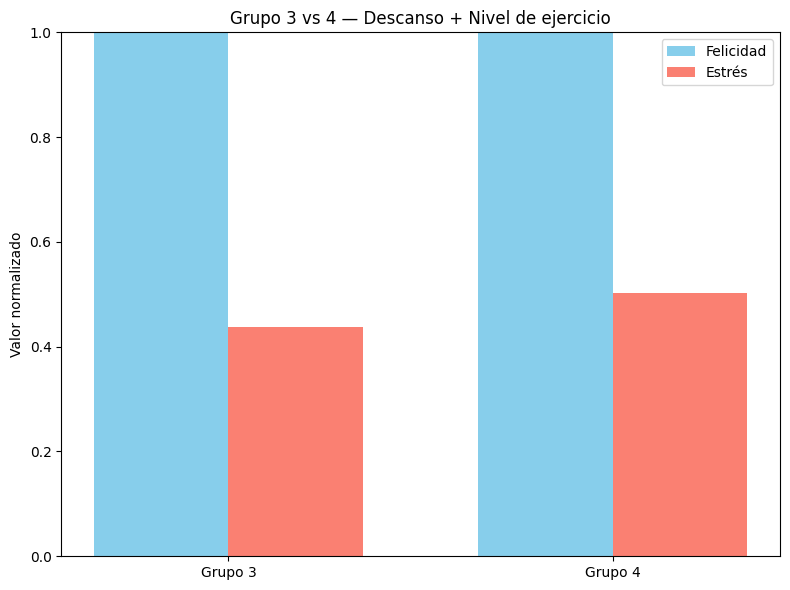

In [21]:
# Grupos
grupo3 = df[(df['Sleep Hours'].between(9, 12)) & (df['Exercise Level'] == 1)]
grupo4 = df[(df['Sleep Hours'] < 5) & (df['Exercise Level'] == 0)]

# Medias normalizadas
h3, e3 = grupo3['Happiness Score'].mean(), grupo3['Stress Level'].mean()
h4, e4 = grupo4['Happiness Score'].mean(), grupo4['Stress Level'].mean()

# Gráfico
labels = ['Grupo 3', 'Grupo 4']
felicidad = [h3, h4]
estres = [e3, e4]
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x, felicidad, width=width, label='Felicidad', color='skyblue')
plt.bar([p + width for p in x], estres, width=width, label='Estrés', color='salmon')

plt.xticks([p + width/2 for p in x], labels)
plt.ylabel('Valor normalizado')
plt.title('Grupo 3 vs 4 — Descanso + Nivel de ejercicio')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:


# Crear instancia del scaler
scaler = MinMaxScaler()

# Seleccionar columnas a normalizar (todas excepto 'Country')
columnas_a_normalizar = df.columns[df.columns != "Country"]

# Aplicar normalización
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])
df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,...,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,Brazil,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Australia,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Japan,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Brazil,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Germany,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
df = df.drop("Country", axis=1)
df

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,...,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.847826,0.5,0.565657,1.0,0.230769,0.400000,0.966667,0.544444,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2996,0.195652,0.0,0.575758,0.0,0.692308,0.900000,0.588889,0.988889,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2997,0.521739,0.5,0.464646,1.0,0.076923,0.316667,0.466667,0.344444,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2998,0.152174,1.0,0.434343,0.0,0.794872,0.383333,0.544444,0.344444,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df.describe()

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,...,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.504993,0.489333,0.512721,0.499000,0.499137,0.514972,0.496689,0.488341,0.326667,0.341333,...,0.197333,0.191000,0.208333,0.191000,0.212333,0.208000,0.209333,0.193333,0.198333,0.191000
std,0.291922,0.408381,0.151502,0.409335,0.293627,0.291205,0.284837,0.284178,0.469072,0.474236,...,0.398052,0.393155,0.406184,0.393155,0.409028,0.405944,0.406901,0.394978,0.398811,0.393155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.000000,0.414141,0.000000,0.256410,0.266667,0.255556,0.244444,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.515152,0.500000,0.487179,0.516667,0.500000,0.488889,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760870,1.000000,0.616162,1.000000,0.769231,0.766667,0.733333,0.722222,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


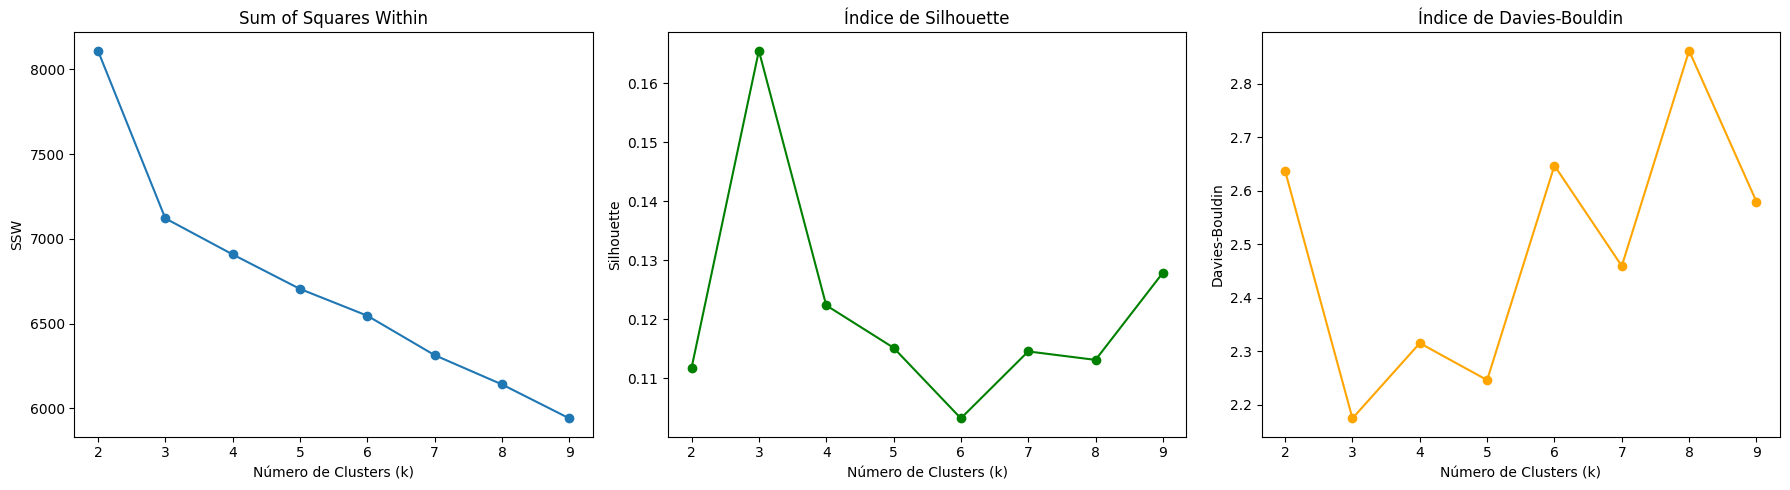

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que df es tu DataFrame ya preprocesado y listo (solo numérico)

# Determinar número óptimo de clusters con varias métricas
inertias = []
silhouettes = []
davies_bouldins = []
K_range = range(2, 10)  # arrancamos en 2 porque silhouette no se puede calcular con k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, labels))
    davies_bouldins.append(davies_bouldin_score(df, labels))

# Graficar las tres métricas
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Sum of Squares Within")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSW")

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title("Índice de Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette")

plt.subplot(1, 3, 3)
plt.plot(K_range, davies_bouldins, marker='o', color='orange')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Davies-Bouldin")

plt.tight_layout()
plt.show()

Análisis de clusters:


,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,...,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar,Cluster
Cluster 0,0.494990,0.487793,0.517332,0.498535,0.491637,0.524251,0.494727,0.476345,0.0,1.0,...,0.183594,0.224609,0.188477,0.213867,0.211914,0.213867,0.190430,0.185547,0.198242,0.0
Cluster 1,0.511957,0.480612,0.509689,0.509184,0.502512,0.517857,0.497336,0.497177,1.0,0.0,...,0.193878,0.192857,0.195918,0.219388,0.206122,0.207143,0.197959,0.198980,0.189796,1.0
Cluster 2,0.508425,0.499498,0.510963,0.489458,0.503527,0.502594,0.498070,0.491979,0.0,0.0,...,0.195783,0.206827,0.188755,0.203815,0.205823,0.206827,0.191767,0.210843,0.184739,2.0


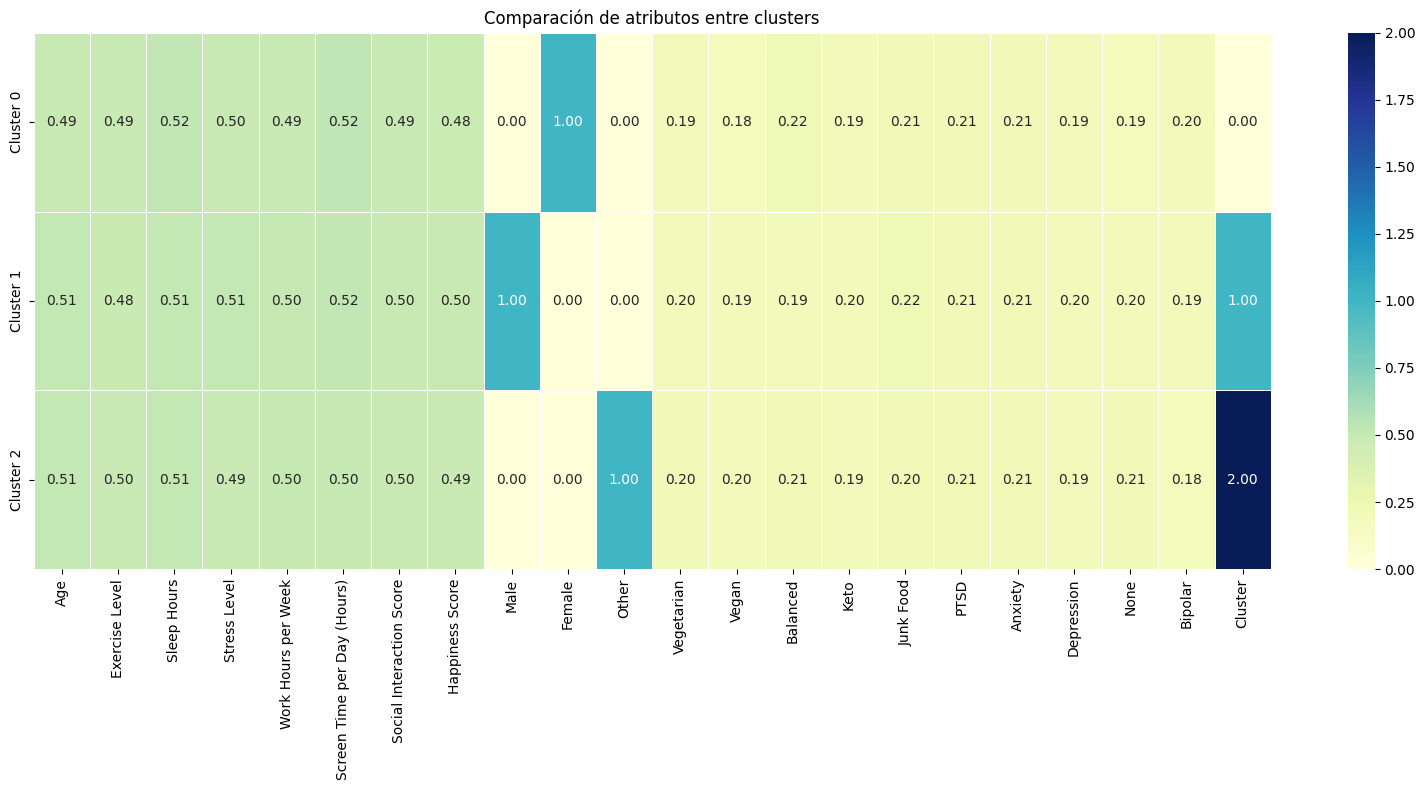

In [27]:
# Elegí tu k óptimo después de ver los gráficos
k_optimo = 3  # por ejemplo, si silhouette fue máximo en 3

# Aplicar KMeans con ese K
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df)

# Analizar clusters
print("Análisis de clusters:")
cluster_stats = pd.DataFrame()

for i in range(k_optimo):
    # Obtener estadísticas para cada cluster
    cluster_data = df[df['Cluster'] == i]
    cluster_mean = cluster_data.mean()
    cluster_mean.name = f"Cluster {i}"
    cluster_stats = pd.concat([cluster_stats, cluster_mean.to_frame().T])

# Mostrar tabla con todos los atributos para cada cluster
display(cluster_stats)

# Visualización adicional con heatmap para comparar clusters
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_stats, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Comparación de atributos entre clusters")
plt.tight_layout()
plt.show()

In [28]:
df.head()

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,...,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar,Cluster
0,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [29]:
df.groupby('Cluster')[['Male', 'Female', 'Other']].sum()

,Male,Female,Other
Cluster,,,
0,0.0,1024.0,0.0
1,980.0,0.0,0.0
2,0.0,0.0,996.0
